In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

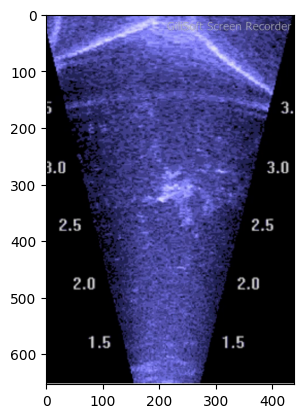

In [ ]:
image = cv2.imread( "sample.png")	# reading input image

image = cv2.cvtColor( image, cv2.COLOR_BGR2RGB)	# converting color channels from BGR to RGB

plt.imshow( image)

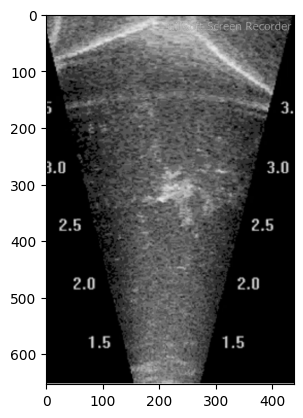

In [ ]:
gray_image = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY)	# converting image to Gray

plt.imshow( gray_image, cmap="gray")

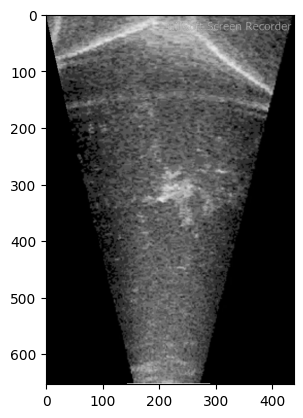

In [ ]:
# removing unwanted margins

height, width = gray_image.shape

mask = np.zeros_like( gray_image)

# creating a polygon shape for interested region/area
polygon = np.array( [
	[ width * 0.33, height],	# Bottom-left
	[ width * 0.66, height],	# Botton-Right
	[ width, 0],				# Top-Right
	[ 0, 0],					# Top-Left
], np.int32)

mask = cv2.fillPoly( mask, [ polygon], 255)

masked_image = cv2.bitwise_and( gray_image, mask)

plt.imshow( masked_image, cmap="gray")

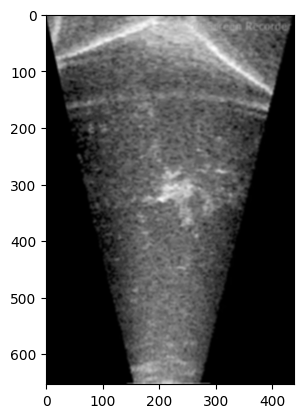

In [ ]:
# Bluring Image for denoising
blurred_image = cv2.GaussianBlur( masked_image, ( 5, 5), sigmaX=2, sigmaY=2)

plt.imshow( blurred_image, cmap="gray")

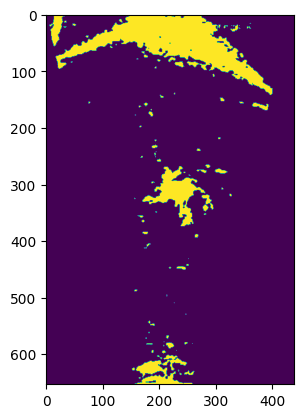

In [ ]:
# Thresholding the brightness

c = 0.5

_, binary_image = cv2.threshold( blurred_image, c * 255, 255, cv2.THRESH_BINARY)

# selecting bright pixels
bright_pixels = np.column_stack( np.where( binary_image > 0))

plt.imshow( binary_image)

In [ ]:
# applying DBSCAN clustering algorithm

eps = 20
min_samples = 10

dbscan = DBSCAN( eps=eps, min_samples=min_samples).fit( bright_pixels)
labels = dbscan.labels_

unique_labels = set( labels)

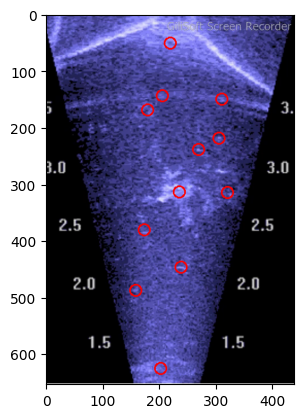

In [ ]:
cluster_centers = []
output_image = image.copy()

for label in unique_labels:
	# label -1 means noise
	if label == -1:
		continue

	# finding points of cluster
	cluster_points = bright_pixels[ labels == label]

	# average of points coordinates as cluster center
	center = cluster_points.mean( axis=0).astype( int)

	cluster_centers.append( center)

	# draw circle around cluster center
	cv2.circle( output_image, ( center[ 1], center[ 0]), 10, ( 255, 0, 0), 2)

plt.imshow( output_image)

In [20]:
np.array( cluster_centers)

array([[ 51, 219],
       [144, 205],
       [150, 310],
       [169, 179],
       [219, 305],
       [314, 235],
       [239, 269],
       [315, 320],
       [381, 173],
       [447, 238],
       [488, 158],
       [626, 202]])